# Bank Personal Loan Modelling
Project by Muhammad Farras Rizki

### Latar Belakang
Dataframe ini milik sebuah bank bernama Thera Bank. Manajemen Thera Bank ingin membuat para nasabah untuk menggunakan jasa pinjaman pribadi dari bank (dengan tetap mempertahankan mereka sebagai deposan). Tahun lalu telah didakan sebuah kampanye yang membuat para nasabah (deposan) Thera Bank menggunakan jasa pinjaman pribadi, dengan tingkat keberhasilan 9%. Hal ini mendorong departemen pemasaran ritel untuk merancang kampanye dengan target pemasaran yang lebih baik untuk meningkatkan rasio keberhasilan dengan anggaran yang minimal.

### Tentang Dataframe
Dataframe `bank` berisi data 5000 nasabah. Data tersebut meliputi informasi demografis nasabah (umur, pendapatan, dll), hubungan nasabah dengan bank (hipotek, rekening, surat berharga, dll), dan respon nasabah terhadap kampanye pinjaman pribadi sebelumnya (`Personal Loan`). Di antara 5000 nasabah ini, hanya 480 (= 9,6%) yang menggunakan jasa pinjaman pribadi yang ditawarkan kepada mereka pada kampanye sebelumnya.

### Tujuan Proyek
- Menemukan insight dari Dataframe `bank` untuk diubah menjadi ide bisnis
- Membuat pemodelan untuk memprediksi minat nasabah dalam menggunakan jasa pinjaman pribadi


### Dataset diambil dari mana
Sumber: https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling


### Deskripsi singkat akan pemodelan yang digunakan
Tujuan dari pemodelan adalah ingin membuat model yang mampu memprediksi minat seorang nasabah dalam menggunakan jasa pinjaman pribadi. Target Variabel yang akan digunakan adalah `Personal Loan` (respon nasabah terhadap kampanye pinjaman pribadi sebelumnya). Variabel yang paling diinginkan untuk optimal adalah Precision (dengan Recall kecil), karena ingin meminimalisir kesalahan prediksi pada nasabah yang sebenarnya ingin menggunakan jasa pinjaman.

Prediksi / Hipotesis yang dibuat berdasarkan target variabel :
- 0: Nasabah tidak berminat menggunakan jasa pinjaman pribadi (Negative)
- 1: Nasabah berminat menggunakan jasa pinjaman pribadi (Positive)
- False Positive: Diprediksi nasabah berminat menggunakan jasa pinjaman, Namun aktualnya nasabah tidak berminat menggunakan jasa pinjaman
- False Negative: Diprediksi nasabah tidak berminat menggunakan jasa pinjaman pribadi, Namun aktualnya nasabah berminat menggunakan jasa pinjaman

Model Machine Learning yang akan diuji antara lain:
1. Logical Regression
2. K-NN
3. Decision Tree Classification
4. Random Forest Classification

In [1]:
# Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

In [2]:
# Import Dataset
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
# Cek Dataset
bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


**Deskripsi Kolom:**

- ID : ID Nasabah
- Age : Usia pelanggan (Pada ulang tahun terakhir)
- Experience : pengalaman profesional (Tahun)
- Income : Pendapatan tahunan pelanggan (\\$000)
- ZIP Code : Kode Pos Alamat Rumah
- Family : Jumlah keluarga Nasabah
- CCAvg : Rata-rata pengeluaran untuk kartu kredit per bulan (\\$000)
- Pendidikan : Jenjang Pendidikan
        1: Undergrad (Setara S1);
        2: Graduate (Setara S2);
        3: Advanced/Professional (Setara S3)
- Mortgage : Nilai KPR rumah jika ada. (\\$000)
- Personal Loan : Apakah nasabah ini menerima pinjaman pribadi yang ditawarkan dalam kampanye terakhir?
- Securities Account : Apakah nasabah memiliki Rekening Sekuritas di bank?
- CD Account : Apakah nasabah memiliki rekening certificate of deposit (CD) di bank?
- Online : Apakah nasabah menggunakan fasilitas internet banking?
- Kartu kredit : Apakah nasabah menggunakan kartu kredit?



In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# 1. Exploratory Data Analysis
## A. Data Cleansing

In [5]:
# Cek Missing Values
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Nilai penjumlahan data Null adalah 0. Maka, dapat disimpulkan bahwa Dataframe `Bank` tidak memiliki missing values.

In [6]:
# Cek data yang memiliki duplikat
bank.duplicated().sum()

0

Nilai penjumlahan data duplikat adalah 0. Maka, dapat disimpulkan bahwa Dataframe `Bank` tidak data yang duplikat. 

## B. Standard EDA
### 1. Statistical Summary

In [7]:
# Mengkategorikan kolom berdasarkan tipe datanya
categoricals = []
numericals = ['ID', 'ZIP Code', 'Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']

In [8]:
# Numericals Statistical Summary
bank[numericals].describe()

,ID,ZIP Code,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,93152.503000,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,2121.852197,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,9307.000000,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,91911.000000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,93437.000000,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,94608.000000,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,96651.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Obesrvasi:
- Pada kolom `Experience` terdapat data yang bernilai negatif, maka dapat dikategorikan sebagai outliers, karena pengalaman tidak bisa bernilai negatif
- Kolom `Personal Loan`, `Securities Account`,  `CD Account`, `Online`, `CreditCard` merupakan kolom dengan tipe data boolean / binary
- Kolom `Age`, `Experience`, `Income`, `CCAvg` dan `Mortgage` merupakan kolom dengan tipe data interval kategori
- Kolom `Family` dan `Education` merupakan kolom dengan tipe data ordinal kategori
- Kolom `ID` dan `ZIP Code` merupakan kolom dengan tipe data nominal
- Hapus kolom `ID` dan `ZIP Code` karena tidak akan digunakan sebagai feature, karena terlalu banyak unique values dan susah mengkategorikannya.

In [9]:
# Hapus outliers pada kolom `Experience`
bank = bank[bank['Experience'] >= 0]  

In [10]:
# Hapus Kolom ID dan ZIP Code
bank.drop(['ID','ZIP Code'], axis = 'columns', inplace = True)

In [11]:
bank.shape

(4948, 12)

In [12]:
# Hapus Kolom ID dan ZIP Code pada numericals
numericals = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']

### 2. Univariate Analysis
#### a. Boxplot
Menggunakan Boxplot untuk mendeteksi adanya outliers

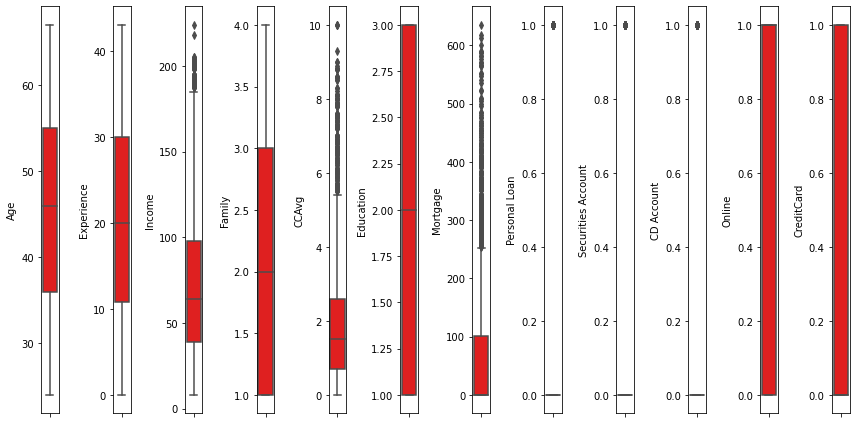

In [13]:
plt.figure(figsize=(12,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=bank[features[i]], color='red')
    plt.tight_layout()

Dari Boxplot diatas dapat diketahui bahawa pada kolom `Income`,`CCAvg`,`Mortgage`,`Personal Loan`,`Securities Account`, dan `CD Account` terdapat data yang dicurigai sebagai outliers. Maka cek nilainya terlebih dahulu sebelum ditindak lanjuti

In [14]:
# Cek nilai outliers terjauh pada kolom `Income`
temp_bank = bank.copy()
outlier = temp_bank['Income'].max()
temp_bank[temp_bank['Income'] == outlier]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3896,48,24,224,2,6.67,1,0,0,0,1,1,1


In [15]:
# Cek nilai outliers terjauh pada kolom `CCAvg`
outlier = temp_bank['CCAvg'].max()
temp_bank[temp_bank['CCAvg'] == outlier]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
787,45,15,202,3,10.0,3,0,1,0,0,0,0
2101,35,5,203,1,10.0,3,0,1,0,0,0,0
2337,43,16,201,1,10.0,2,0,1,0,0,0,1


In [16]:
# Cek nilai outliers terjauh pada kolom `Mortgage`
outlier = temp_bank['Mortgage'].max()
temp_bank[temp_bank['Mortgage'] == outlier]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2934,37,13,195,2,6.5,1,635,0,0,0,1,0


Observasi:

- Pada kolom `Income` terdapat outliers dengan nilai terjauh sebesar 224. Hal ini memiliki arti bahwa pendapatan tahunan nasabah sebesar \\$224000. Maka outliers tidak perlu dihapus karena nilai tersebut masih tergolong wajar dan memang benar adanya (bukan salah input).
- Pada kolom `CCAvg` terdapat outliers dengan nilai terjauh sebesar 10. Hal ini memiliki arti bahwa pengeluaran rata-rata untuk kartu kredit per bulan nasabah sebesar \\$10000. Maka tidak perlu dihapus karena nilai tersebut masih tergolong wajar dan memang benar adanya (bukan salah input).
- Pada kolom `Mortgage` terdapat outliers dengan nilai terjauh sebesar 635. Hal ini memiliki arti bahwa nasabah memiliki cicilan KPR rumah sebesar \\$635000. Maka tidak perlu dihapus karena nilai tersebut masih tergolong wajar dan memang benar adanya (bukan salah input).
- Untuk outlier pada kolom `Personal Loan`, `Securities Account`, dan `CD Account` dapat diabaikan karena kolom tersebut merupakan kolom boolean / binary

#### b. KDE plot
Menggunakan KDE plot untuk mengetahui distribusi tiap kolom

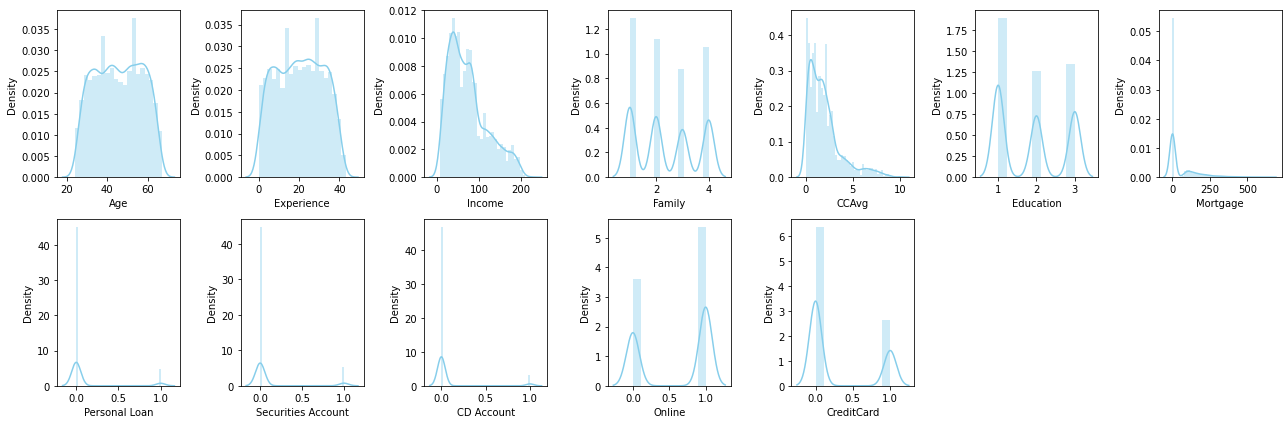

In [17]:
plt.figure(figsize=(18,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=bank[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observasi:

- Pada kolom `Age`, `Experience` bentuk grafik sucah cukup simetris.
- Pada kolom `Income`, `CCAvg`, dan `Mortgage` bentuk grafik tidak simetris (positive skew), maka jika ingin melanjutkan ke pembuatan machine learning, perlu dilakukan log transformasi.
- Pada kolom `Personal Loan`, `Securities Account`, `CD Account`, dan `CreditCard` memiliki distribusi frekuensi data yang tidak seimbang, dengan jumlah data 0 jauh lebih banyak dibandingkan 1.
- Sedangkan pada kolom `Online` nilai tidak seimbang namun tidak cukup ekstrem, jumlah nilai 1 lebih banyak daripada nilai 0.
- Untuk kolom `Family`, dan `Education` dapat diabaikan karena memiliki nilai diskrit yang terbatas

### 3. Multivariate / Bivariate Analysis
Menggunakan Correlation heatmap dan Pairplot untuk mencari hubungan/korelasi antar variabel
##### a. correlation heatmap

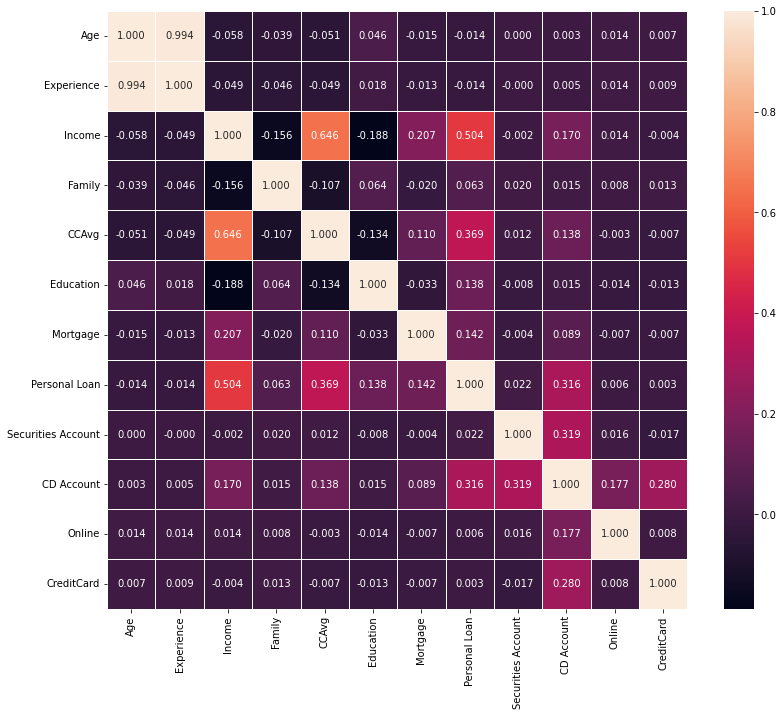

In [18]:
fig, ax = plt.subplots(figsize = (13, 11))
sns.heatmap(bank.corr(),cbar=True,annot=True,linewidths=0.5,ax=ax,fmt='.3f')
plt.show()

Observasi:
- Feature `Age` dan `Experience` memiliki korelasi yang paling tinggi (0.99). Maka, semakin tua usia customer maka akan semakin lama pula pengalaman kerjanya.
- Terdapat beberapa Feature yang saling tidak berkorelasi, salah satunya adalah `Securities Account` dan `Age` dengan korelasi sebesar 0.00. Maka, dapat disimpulkan bahwa kedua feature tersebut benar-benar tidak saling mempengaruhi.
- Feature yang memiliki koreklasi yang paling tinggi dengan target variabel (`Personal Loan`) adalah `Income`, yaitu sebesar 0.504
- Sedangkan, feature yang paling tidak berkorelasi dengan target variabel adalah `CreditCard` dengan nilai korelasi sebesar 0.003

##### b. pairplot of the data

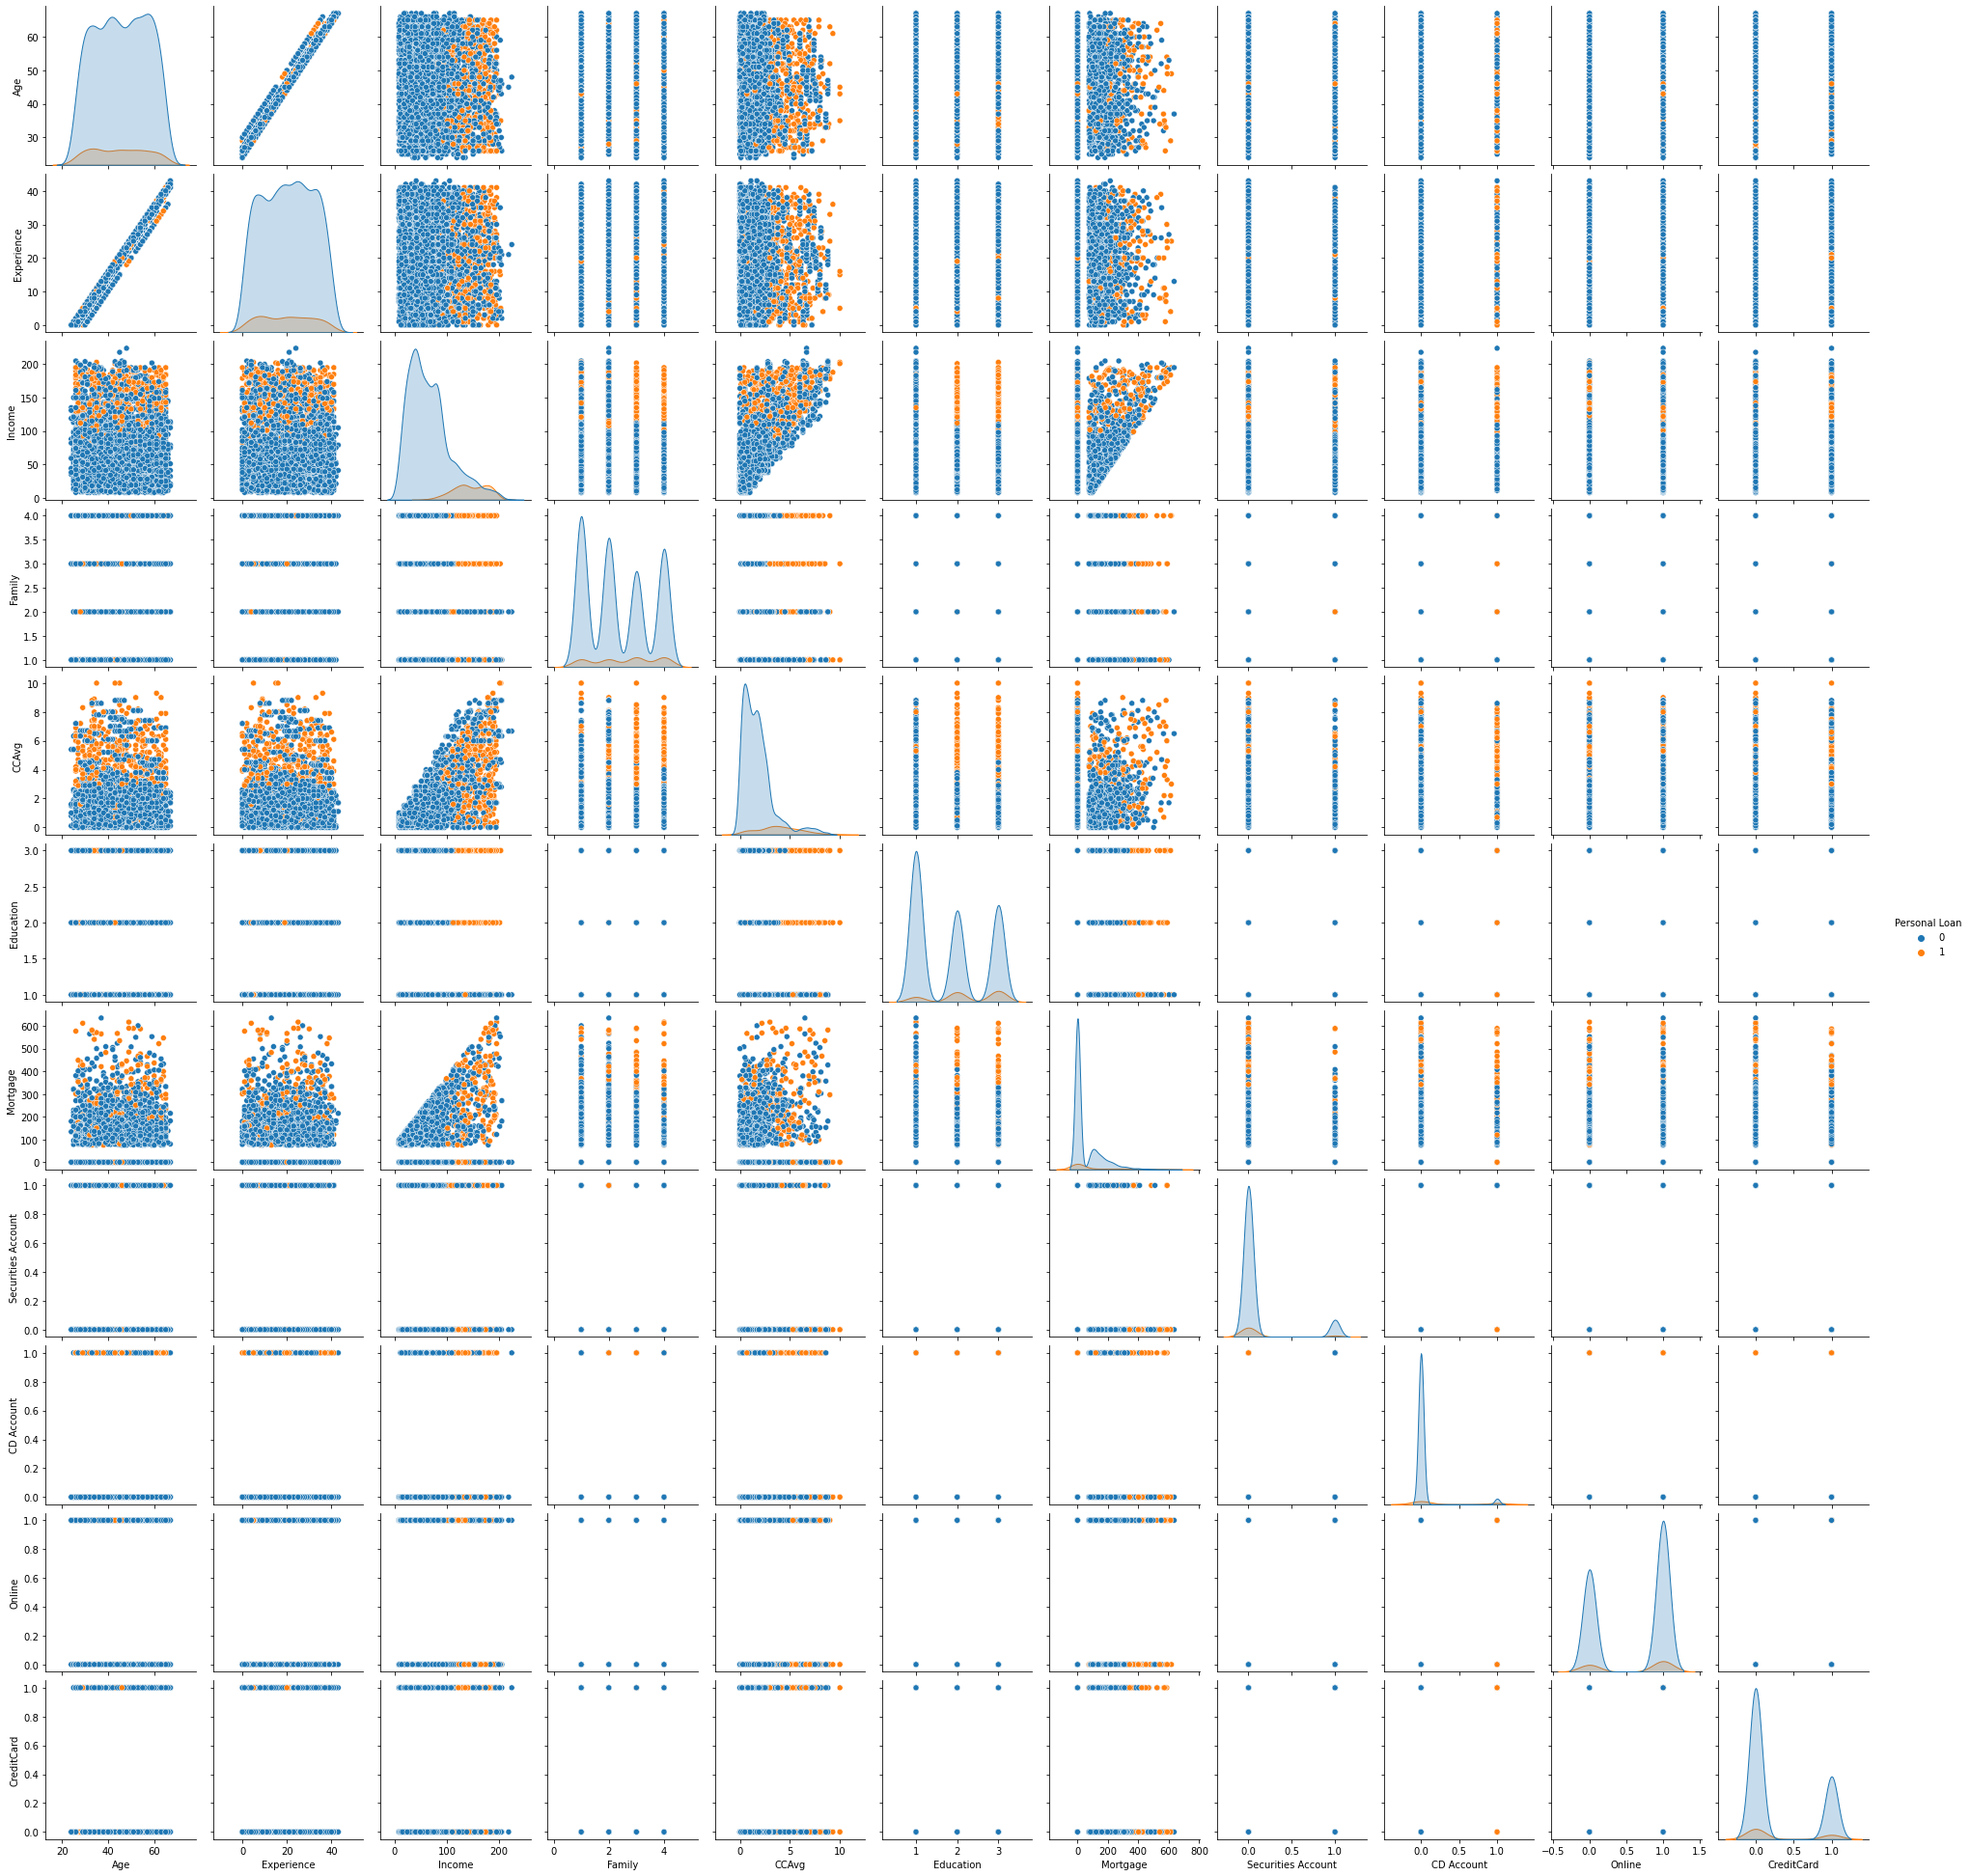

In [19]:
sns.pairplot(bank, hue='Personal Loan')
plt.show()

Karena grafik pada pairplot terlalu banyak, maka akan dipilih beberapa feature yang memiliki pola paling jelas terhadap target variabel (`Personal Loan`)

1. Kolom **`Income`** dan **`Age`** terhadap **`Personal Loan`**

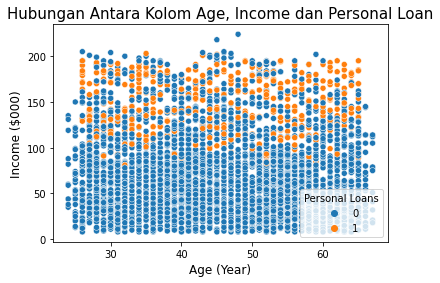

In [20]:
plt.title('Hubungan Antara Kolom Age, Income dan Personal Loan', fontsize=15)
sns.scatterplot(x = 'Age', y = 'Income', data = bank, hue = 'Personal Loan')
plt.xlabel('Age (Year)', fontsize = 12)
plt.ylabel('Income ($000)', fontsize = 12)
plt.legend(loc='lower right', title='Personal Loans')
plt.show()

Dari diagram pairplot dapat dikatakan bahwa, nasabah dengan pendapatan tahunan lebih dari \\$100000 lebih sering menggunakan jasa pinjaman pribadi, jika dibandingkan nasabah dengan pendapatan tahunan kurang dari \\$100000. Karena diagram belum menunjukan pola yang jelas, maka untuk memastikan pernyataan dapat dilakukan pengecekan pada Deep Dive Question.

2. Kolom **`Income`** dan **`Education`** terhadap **`Personal Loan`**

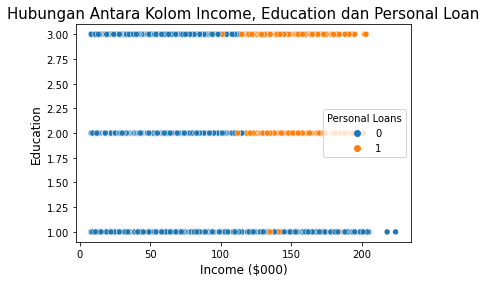

In [21]:
plt.title('Hubungan Antara Kolom Income, Education dan Personal Loan', fontsize=15)
sns.scatterplot(y = 'Education', x = 'Income', data = bank, hue = 'Personal Loan')
plt.ylabel('Education', fontsize = 12)
plt.xlabel('Income ($000)', fontsize = 12)
plt.legend(loc='right', title='Personal Loans')
plt.show()

Dari diagram pairplot dapat dikatakan bahwa, nasabah yang memiliki gelar pendidikan S2 maupun S3 dengan pendapatan tahunan lebih dari $100000 lebih sering menggunakan jasa pinjaman pribadi.

3. Kolom **`CCAvg`** dan **`Family`** terhadap **`Personal Loan`**

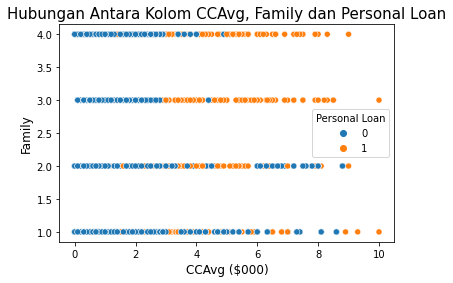

In [22]:
plt.title('Hubungan Antara Kolom CCAvg, Family dan Personal Loan', fontsize=15)
sns.scatterplot(x = 'CCAvg', y = 'Family', data = bank, hue = 'Personal Loan')
plt.ylabel('Family', fontsize = 12)
plt.xlabel('CCAvg ($000)', fontsize = 12);
plt.show()

Dari diagram pairplot dapat dikatakan bahwa, nasabah dengan jumlah anggota keluarga sekaligus pengeluaran kartu kredit yang besar lebih sering menggunakan jasa pinjaman pribadi.

4. Kolom **`Personal Loan`** dan **`CD Account`**

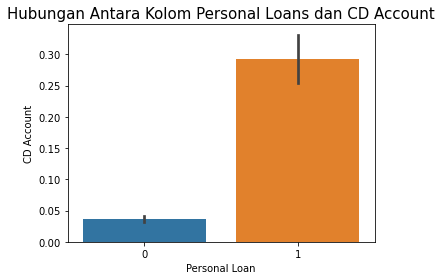

In [23]:
fig, ax = plt.subplots(figsize = (5.5, 4))
plt.title('Hubungan Antara Kolom Personal Loans dan CD Account', fontsize=15)
sns.barplot(x=bank['Personal Loan'],y=bank['CD Account'])
plt.show()

Dari diagram barchart dapat dikatakan bahwa, nasabah yang memiliki Sertifikat Deposito lebih sering menggunakan jasa pinjaman pribadi.

## C. Deep Dive Question

In [24]:
# Buat dataframe baru khusus untuk Deep Dive Question
bank_ddq = bank.copy()

#### 1. Berdasarkan rentang pendapatan tahunan nasabah, sebutkan persentase nasabah menerima tawaran jasa pinjaman ! (Tinggi ke rendah)

Dengan ketentuan klasifikasi pendapatan tahunan (x), sebagai berikut:

- x < \$50000, dikategorikan sebagai 'Under Fifty'
- \\$50000 > x > \$100000, dikategorikan sebagai 'Fifty to One Hundred'
- \\$100000 > x > \$150000, dikategorikan sebagai 'One Hundred to One Hundred and Fifty'
- \\$150000 > x > \$200000, dikategorikan sebagai 'One Hundred and Fifty to Two Hundred'
- x >= \$200000, dikategorikan sebagai 'Above Two Hundred'

In [25]:
## Income Encoding
def inc_class(x):
    if x < 50:
        return '<50'
    elif x < 100:
        return '50-100'
    elif x < 150:
        return '100-150'
    elif x < 200:
        return '150-200'
    else:
        return '>=200'
    
bank_ddq['income_cat'] = np.vectorize(inc_class)(bank_ddq['Income'])

In [26]:
## Agregasi data 'Personal Loan'

# Total nasabah yang menggunakan jasa pinjaman berdasarkan pendapatan tahunan
income_approve_loan = (bank_ddq
                    .groupby('income_cat')
                    .agg(count_approve_loan=('Personal Loan','sum'))
                    .reset_index())

# Total nasabah yang ditawari jasa pinjaman berdasarkan pendapatan tahunan
income_all_loan = (bank_ddq
                .groupby('income_cat')
                .agg(count_all_loan=('Personal Loan','count'))
                .reset_index())

In [27]:
income_loan_merge = pd.merge(income_approve_loan, income_all_loan, on='income_cat', how='outer')

In [28]:
income_loan_merge['approve_loan_inc(%)'] = (income_loan_merge['count_approve_loan'] / income_loan_merge['count_all_loan'])*100
income_loan_merge.sort_values('approve_loan_inc(%)',ascending=False)

,income_cat,count_approve_loan,count_all_loan,approve_loan_inc(%)
1,150-200,217,433,50.115473
0,100-150,219,757,28.929987
4,>=200,3,19,15.789474
2,50-100,41,1889,2.170461
3,<50,0,1850,0.000000


Dari tabel diatas, dapat disimpulkan bahwa nasabah dengan pendapatan tahunan antara \\$150000 - \$200000 memiliki persentase tertinggi dalam menerima tawaran jasa pinjaman pribadi, dengan nilai 50,12%

#### 2. Sebutkan rentang usia dengan persentase pengajuan pinjaman berhasil tertinggi !

Dengan ketentuan klasifikasi usia (x), sebagai berikut:
- usia < 30 tahun, dikategorikan sebagai 'Twenty'
- usia dengan rentang 30 > x > 40 tahun, dikategorikan sebagai 'Thirty'
- usia dengan rentang 40 > x > 50 tahun, dikategorikan sebagai 'Fourty'
- usia dengan rentang 50 > x > 60 tahun, dikategorikan sebagai 'Fifty'
- usia >= 60 tahun dikategorikan sebagai 'Above Sixty'

In [29]:
## Age Encoding
def age_class(x):
    if x < 30:
        return 'Twenty'
    elif x < 40:
        return 'Thirty'
    elif x < 50:
        return 'Fourty'
    elif x < 60:
        return 'Fifty'
    else:
        return 'Above Sixty'
    
bank_ddq['age_cat'] = np.vectorize(age_class)(bank_ddq['Age'])

In [30]:
## Agregasi data Personal Loan

# Jumlah customer yang berhasil mendapatkan pinjaman berdasarkan rentang usia
age_approve_loan = (bank_ddq
                    .groupby('age_cat')
                    .agg(count_approve_loan=('Personal Loan','sum'))
                    .reset_index())

# Jumlah customer yang mengajukan pinjaman berdasarkan rentang usia
age_all_loan = (bank_ddq
                .groupby('age_cat')
                .agg(count_all_loan=('Personal Loan','count'))
                .reset_index())

In [31]:
age_loan_merge = pd.merge(age_approve_loan, age_all_loan, on='age_cat', how='outer')

In [32]:
age_loan_merge['approve_loan_age(%)'] = (age_loan_merge['count_approve_loan'] / age_loan_merge['count_all_loan'])*100
age_loan_merge.sort_values('approve_loan_age(%)',ascending=False)

,age_cat,count_approve_loan,count_all_loan,approve_loan_age(%)
4,Twenty,49,436,11.238532
0,Above Sixty,69,674,10.237389
3,Thirty,127,1247,10.184443
2,Fourty,117,1257,9.307876
1,Fifty,118,1334,8.845577


Dari tabel diatas, dapat disimpulkan bahwa nasabah dengan rentang usia dibawah 30 tahun memiliki persentase tertinggi dalam menerima tawaran jasa pinjaman pribadi, dengan nilai 11,23%. Nilai tersebut terbilang rendah untuk dijadikan patokan dalam pemilihan target marketing nasabah. 

# 2. Model Machine Learning

### Log transformasi
Pada kolom `Income`,`CCAvg`, dan `Mortgage` bentuk grafik tidak simetris (positive skew), maka perlu dilakukan log transformasi.

In [33]:
# Buat dataframe baru khusus untuk Model Machine Learning 
bank_ml = bank.copy()

In [34]:
# Log Transformasi pada kolom Income
bank_ml['Income'] = bank_ml['Income'].transform(np.log)

<AxesSubplot:xlabel='Income', ylabel='Count'>

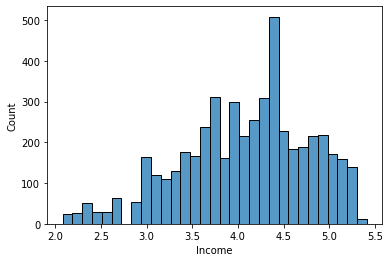

In [35]:
sns.histplot(bank_ml['Income'])

In [36]:
# Log Transformasi pada kolom CCAvg
bank_ml['CCAvg'] = np.log(bank_ml['CCAvg'] + 1) #tambah 1 karena ada nilai yg 0 (log 0 = invinity)

<AxesSubplot:xlabel='CCAvg', ylabel='Count'>

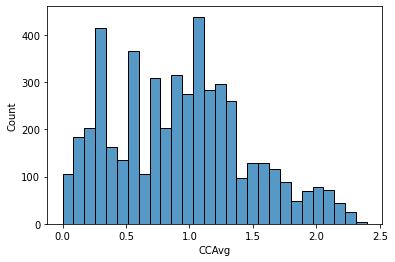

In [37]:
sns.histplot(bank_ml['CCAvg'])

In [38]:
# Log Transformasi pada kolom Mortgage
bank_ml['Mortgage'] = np.log(bank_ml['Mortgage'] + 1) #tambah 1 karena ada nilai yg 0 (log 0 = invinity)

<AxesSubplot:xlabel='Mortgage', ylabel='Count'>

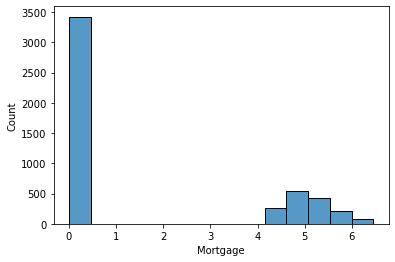

In [39]:
sns.histplot(bank_ml['Mortgage'])

### Cek Multicollinearity

In [40]:
# Spliting Dataset (3:1)
bank_train, bank_test = train_test_split(bank_ml, 
                                     test_size = 0.25, random_state = 1) 

x_train_data = bank_train.loc[:, bank_train.columns!='Personal Loan']
y_train_data = bank_train.loc[:, bank_train.columns=='Personal Loan']

x_test_data = bank_test.loc[:, bank_test.columns!='Personal Loan']
y_test_data = bank_test.loc[:, bank_test.columns=='Personal Loan']

In [41]:
# Hitung VIF Score
X = add_constant(x_train_data)

vif_bank = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_bank.columns = ['feature','vif_score']
vif_bank = vif_bank.loc[vif_bank.feature!='const']
vif_bank

,feature,vif_score
1,Age,93.064755
2,Experience,92.982863
3,Income,1.623870
4,Family,1.019863
5,CCAvg,1.584945
6,Education,1.098804
7,Mortgage,1.005713
8,Securities Account,1.130348
9,CD Account,1.295136
10,Online,1.036569


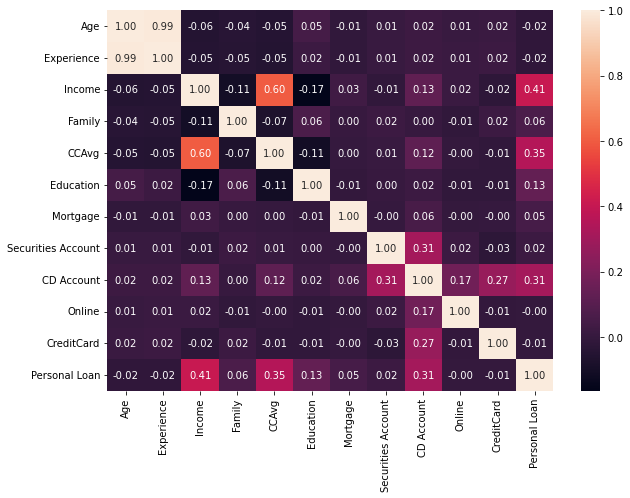

In [42]:
# Heatmap correlation
loan_train = pd.concat([x_train_data, y_train_data], axis=1)
corr = loan_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Karena kolom `Experience` dan `Age` saling berkorelasi tinggi (>8) maka hapus salah satu yang memiliki korelasi dengan `Personal Loan` paling rendah. Karena kedua kolom mempunyai nilai yang sama maka pilih salah satu, pilih kolom `Experience`

In [43]:
# Drop features 'Experience'
x_train_data = x_train_data.drop(columns=['Experience'])
x_test_data = x_test_data.drop(columns=['Experience'])

In [44]:
# Recheck VIF
X = add_constant(x_train_data)

vif_bank = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_bank.columns = ['feature','vif_score']
vif_bank = vif_bank.loc[vif_bank.feature!='const']
vif_bank

,feature,vif_score
1,Age,1.008642
2,Income,1.620373
3,Family,1.016994
4,CCAvg,1.577231
5,Education,1.035458
6,Mortgage,1.005696
7,Securities Account,1.129895
8,CD Account,1.294248
9,Online,1.036562
10,CreditCard,1.106657


### Modeling Data

In [45]:
# Handling Imbalance Data - Undersampling

print("Sebelum di undersampling:", Counter(y_train_data['Personal Loan']))

undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 1)
x_train_under, y_train_under = undersample.fit_resample(x_train_data, 
                                                        y_train_data)

print("Sesudah di undersampling:", Counter(y_train_under['Personal Loan']))

Sebelum di undersampling: Counter({0: 3351, 1: 360})
Sesudah di undersampling: Counter({0: 360, 1: 360})


In [46]:
# Evaluation Function
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

## A. K-Nearest Neighbors (KNN)

In [47]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_under, y_train_under)

KNeighborsClassifier()

In [48]:
evaluate(knn)

Accuracy: 0.7962813257881972
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.79      0.88      1117
           1       0.30      0.81      0.43       120

    accuracy                           0.80      1237
   macro avg       0.64      0.80      0.66      1237
weighted avg       0.91      0.80      0.83      1237

------
Assuming 1 as positive, we get:

True Positive: 97
True Negative: 888
False Positive: 229
False Negative: 23

Precision: 0.29754601226993865
Recall: 0.8083333333333333
F1-Score: 0.4349775784753363


F1-Score is not too good, so we should tune the `n_neighbors` value. Will try `n_neighbors` value from 3 to 15 and see if we can improve the F1-Score and accuracy.

In [49]:
def evaluate_f1score(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1score = 2 * (precision * recall)/(precision + recall)
    
    return f1score

In [50]:
f1score_dict = {
    'n':[],
    'F1-Score':[]
}
for n in [3,5,7,9,11,13,15]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train_under, y_train_under)
    f1score = evaluate_f1score(knn)
    f1score_dict['n'].append(n)
    f1score_dict['F1-Score'].append(f1score)
    
bank_knn_f1score = pd.DataFrame(f1score_dict)

In [51]:
bank_knn_f1score.sort_values(['F1-Score'], ascending = False)

,n,F1-Score
0,3,0.460497
1,5,0.434978
2,7,0.419913
3,9,0.390852
4,11,0.371542
5,13,0.349146
6,15,0.346008


As we can see, training K-Nearest Neighbors are quite lengthy, and the best neighbors value for our dataset is 3.

In [52]:
# Model KNN with n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_under, y_train_under)
evaluate(knn)

Accuracy: 0.8067906224737268
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1117
           1       0.32      0.85      0.46       120

    accuracy                           0.81      1237
   macro avg       0.65      0.83      0.67      1237
weighted avg       0.92      0.81      0.84      1237

------
Assuming 1 as positive, we get:

True Positive: 102
True Negative: 896
False Positive: 221
False Negative: 18

Precision: 0.3157894736842105
Recall: 0.85
F1-Score: 0.46049661399548536


## B. Logistic Regression

In [53]:
logreg = LogisticRegression()
logreg.fit(x_train_under, y_train_under)

LogisticRegression()

In [54]:
evaluate(logreg)

Accuracy: 0.8940986257073565
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1117
           1       0.48      0.92      0.63       120

    accuracy                           0.89      1237
   macro avg       0.73      0.90      0.78      1237
weighted avg       0.94      0.89      0.91      1237

------
Assuming 1 as positive, we get:

True Positive: 110
True Negative: 996
False Positive: 121
False Negative: 10

Precision: 0.47619047619047616
Recall: 0.9166666666666666
F1-Score: 0.6267806267806267


## C. Decision Tree Classifier

In [55]:
dt = DecisionTreeClassifier()
dt.fit(x_train_under, y_train_under)
evaluate(dt)

Accuracy: 0.9668552950687146
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1117
           1       0.77      0.94      0.85       120

    accuracy                           0.97      1237
   macro avg       0.88      0.96      0.91      1237
weighted avg       0.97      0.97      0.97      1237

------
Assuming 1 as positive, we get:

True Positive: 113
True Negative: 1083
False Positive: 34
False Negative: 7

Precision: 0.7687074829931972
Recall: 0.9416666666666667
F1-Score: 0.846441947565543


## D. Random Forest

### 1. Random Forest Classifier Normal

In [56]:
model = RandomForestClassifier(random_state = 1)
model.fit(x_train_data, y_train_data)
evaluate(model)

Accuracy: 0.9854486661277284
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1117
           1       0.99      0.86      0.92       120

    accuracy                           0.99      1237
   macro avg       0.99      0.93      0.96      1237
weighted avg       0.99      0.99      0.98      1237

------
Assuming 1 as positive, we get:

True Positive: 103
True Negative: 1116
False Positive: 1
False Negative: 17

Precision: 0.9903846153846154
Recall: 0.8583333333333333
F1-Score: 0.9196428571428571


### 2. Random Forest Classifier with Undersampling

In [57]:
under_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
under_model.fit(x_train_under, y_train_under)
evaluate(under_model, x_test_data, y_test_data)

Accuracy: 0.9805982215036378
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1117
           1       0.84      0.98      0.91       120

    accuracy                           0.98      1237
   macro avg       0.92      0.98      0.95      1237
weighted avg       0.98      0.98      0.98      1237

------
Assuming 1 as positive, we get:

True Positive: 118
True Negative: 1095
False Positive: 22
False Negative: 2

Precision: 0.8428571428571429
Recall: 0.9833333333333333
F1-Score: 0.9076923076923077


### 3. Random Forest Classifier with Oversampling

In [58]:
# Oversampled Model
print("Sebelum di oversampling:",Counter(y_train_data['Personal Loan']))

SMOTE = SMOTE(random_state = 1)

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train_data, y_train_data)

print("Sesudah di oversampling:", Counter(y_train_SMOTE['Personal Loan']))

Sebelum di oversampling: Counter({0: 3351, 1: 360})
Sesudah di oversampling: Counter({0: 3351, 1: 3351})


In [59]:
over_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model, x_test_data, y_test_data)

Accuracy: 0.98464025869038
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1117
           1       0.93      0.91      0.92       120

    accuracy                           0.98      1237
   macro avg       0.96      0.95      0.96      1237
weighted avg       0.98      0.98      0.98      1237

------
Assuming 1 as positive, we get:

True Positive: 109
True Negative: 1109
False Positive: 8
False Negative: 11

Precision: 0.9316239316239316
Recall: 0.9083333333333333
F1-Score: 0.919831223628692


### 4. Random Forest Classifier with Oversampling and Undersampling

In [60]:
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(x_train_data, y_train_data)
evaluate(pipeline, x_test_data, y_test_data)

Accuracy: 0.9870654810024252
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1117
           1       0.95      0.92      0.93       120

    accuracy                           0.99      1237
   macro avg       0.97      0.96      0.96      1237
weighted avg       0.99      0.99      0.99      1237

------
Assuming 1 as positive, we get:

True Positive: 110
True Negative: 1111
False Positive: 6
False Negative: 10

Precision: 0.9482758620689655
Recall: 0.9166666666666666
F1-Score: 0.9322033898305084


### 5. Random Forest Classifier with Best Coefficient of Oversampling and Undersampling For Best Precision

In [61]:
oversampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
undersampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

result = {
    'over_coef':[],
    'under_coef':[],
    'acc':[],
    'prec':[],
    'recall':[],
    'f1':[]
}

for over_score in tqdm(oversampling_coef):
    for under_score in undersampling_coef:
        try:
            combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
            over = SMOTE(sampling_strategy = over_score)
            under = RandomUnderSampler(sampling_strategy = under_score)
            steps = [('o', over), ('u', under), ('model', combined_model)]
            pipeline = Pipeline(steps = steps)

            pipeline.fit(x_train_data, y_train_data)
            y_pred = pipeline.predict(x_test_data)

            result['over_coef'].append(over_score)
            result['under_coef'].append(under_score)
            result['acc'].append(accuracy_score(y_test_data, y_pred))
            result['prec'].append(precision_score(y_test_data, y_pred))
            result['recall'].append(recall_score(y_test_data, y_pred))
            result['f1'].append(f1_score(y_test_data, y_pred))
        except:
            pass

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.99s/it]


In [62]:
df_result = pd.DataFrame(result)

In [63]:
df_result.sort_values(['prec'], ascending = False)

,over_coef,under_coef,acc,prec,recall,f1
0,0.2,0.2,0.987065,0.990566,0.875000,0.929204
18,0.4,0.5,0.989491,0.981982,0.908333,0.943723
1,0.2,0.3,0.987874,0.981651,0.891667,0.934498
9,0.3,0.3,0.986257,0.981308,0.875000,0.925110
17,0.4,0.4,0.987065,0.972727,0.891667,0.930435
24,0.5,0.5,0.987065,0.964286,0.900000,0.931034
31,0.6,0.7,0.988682,0.956897,0.925000,0.940678
11,0.3,0.5,0.987065,0.956140,0.908333,0.931624
10,0.3,0.4,0.987065,0.956140,0.908333,0.931624
33,0.6,0.9,0.987065,0.948276,0.916667,0.932203


Koefisien terbaik untuk mendapatkan nilai Precision tertinggi pada Model Random Forest dengan Oversampling dan Undersampling adalah 
- Oversampling: 0.2
- Undersampling: 0.2

Observasi:

1. Model dengan konfigurasi yang memiliki nilai akurasi terbaik adalah **Model Random Forest dengan Oversampling dan Undersampling**, dengan koefisien oversampling = 0,5 dan undersampling = 0,5
2. Model dengan konfigurasi yang memiliki nilai precision terbaik **Model Random Forest dengan Oversampling dan Undersampling**, dengan koefisien oversampling = 0,2 dan undersampling = 0,2
2. Model dengan konfigurasi yang memiliki nilai recall terbaik adalah **Model Random Forest Classifier dengan Undersampling**
4. Model dengan konfigurasi yang memiliki nilai F1-Score terbaik adalah **Model Random Forest dengan Oversampling dan Undersampling**, dengan koefisien oversampling = 0,5 dan undersampling = 0,5. 

#### Kesimpulan:

Dari observasi yang dilakukan, maka dapat disimpulkan bahwa model terbaik untuk memprediksi nasabah yang berminat menggunakan jasa pinjaman pribadi adalah **Model Random Forest dengan Oversampling dan Undersampling** dengan koefisien oversampling = 0,2 dan undersampling = 0,2 karena memiliki nilai Precision terbaik. Dengan hasil konfigurasi sebagai berikut:
- Akurasi: ±0.986
- Precision: ±0.990
- Recall: ±0.867
- F1-Score: ±0.924		

# 5. Rekomendasi

1. `Income` berkorelasi cukup besar dengan nilai positif terhadap `Personal Loan`. Artinya, semakin besar pendapatan tahunan nasabah maka akan semakin besar juga minat nasabah dalam menggunakan jasa pinjaman. Dengan demikian jika Bank ingin memperbanyak target pemasaran, maka Bank dapat lebih fokus pada nasabah dengan pendapatan rendah (< $100000) karena minat mereka dalam menggunakan jasa pinjaman lebih rendah.


2. Dari observasi yang telah dilakukan pada diagram pairplot antara `Education`, `Income` dan `Personal Loan`, dapat diambil kesimpulan bahwa nasabah dengan tingkat pendidikan **Graduate** dan **Professional** lebih berminat menggunakan jasa pinjaman. Maka, Bank dapat lebih fokus pada nasabah dengan tingkat pendidikan **Undergrad** untuk memperbanyak target pemasaran. Hal ini dapat membantu meningkatkan target pemasaran secara signifikan karena mayoritas nasabah memiliki tingkat pendidikan Undergrade (41% dari total nasabah). 


3. Pada diagram pairplot antara `CCAvg`, `Family` dan `Personal Loan`, dapat disimpulkan bahwa nasabah dengan jumlah anggota keluarga sekaligus pengeluaran kartu kredit yang besar lebih berminat menggunakan jasa pinjaman. Maka, jika Bank ingin memperbanyak target pemasaran, Bank dapat lebih fokus pada nasabah dengan jumlah anggota keluarga yang lebih sedikit (< 3 orang) dan nasabah dengan pengeluaran kartu kredit rendah (< $4000)


4. Dari diagram barchart antara `CD Account` dan `Personal Loan`,  dapat disimpulkan bahwa nasabah yang memiliki Sertifikat Deposito lebih berminat menggunakan jasa pinjaman. Maka, Pihak Bank dapat lebih fokus pada nasabah yang tidak memiliki Sertifikat Deposito dengan beberapa persyaratan tertentu, seperti memiliki pendapatan tahunan lebih dari $100000.


5. Dari observasi tentang beberapa model yang telah diuji, maka dapat disimpulkan bahwa model terbaik untuk memprediksi minat nasabah dalam menggunakan jasa pinjaman pribadi adalah **Model Random Forest Classifier dengan Oversampling dan Undersampling** dengan koefisien oversampling = 0,2 dan undersampling = 0,2 karena memiliki nilai Precision terbaik yaitu 99% dengan akurasi 98,6%.